In [1]:
using PyCall
using PyPlot

PyPlot.svg(true)

true

In [4]:
function FTCS_update(dt, dx, a, u)
    C = u*dt/dx
    a_new = copy(a)
    a_new[2:end-1] = a[2:end-1] .- C/2 .* (a[3:end].-a[1:end-2])
    a_new[1] = a[1] - C/2*(a[2]-a[end])
    a_new[end] = a[end] - C/2*(a[1] - a[end-1])
    a_new
end

FTCS_update (generic function with 1 method)

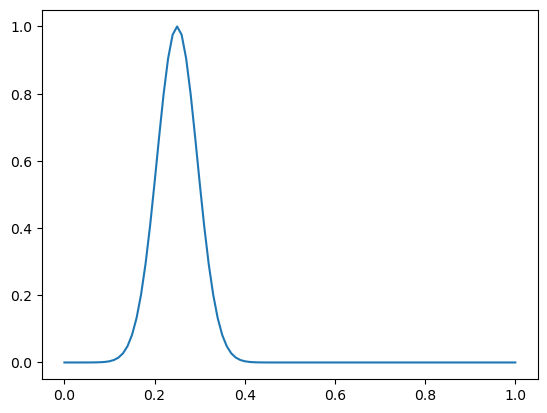

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x119a9b128>

In [2]:
xs = collect(0:0.01:1)
dx = xs[2]-xs[1]
dt = dx/2

a0 = exp.(-0.5*(xs.-0.25).*(xs.-0.25)./(0.002))
plot(xs, a0)

In [36]:
a = copy(a0)
for i in 1:20
    a = FTCS_update(dt, dx, a, 1.0)
end

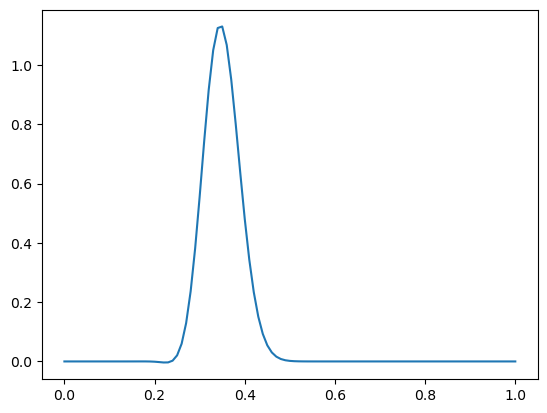

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x141652c88>

In [37]:
plot(xs, a)

In [38]:
function upwind_update(dt, dx, a, u)
    C = u*dt/dx
    
    a_new = copy(a)
    a_new[2:end] = a[2:end] .- C*(a[2:end] .- a[1:end-1])
    a_new[1] = a[1] - C*(a[1] - a[end])
    
    a_new
end

upwind_update (generic function with 1 method)

In [41]:
a = copy(a0)
for i in 1:200
    a = upwind_update(dt, dx, a, 1.0)
end

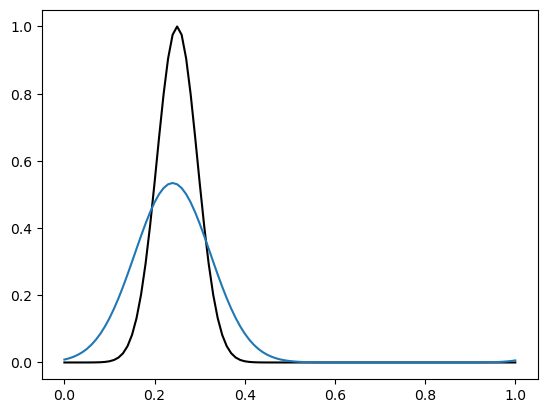

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1419eef28>

In [43]:
plot(xs, a0, "-k")
plot(xs, a)

In [5]:
function upwind_burgers_update(dt, dx, a)
    C = a*dt/dx
    
    a_new = copy(a)
    a_new[2:end] = a[2:end] .- C[2:end].*(a[2:end] .- a[1:end-1])
    a_new[1] = a[1] - C[1]*(a[1] - a[end])
    
    a_new
end

upwind_burgers_update (generic function with 1 method)

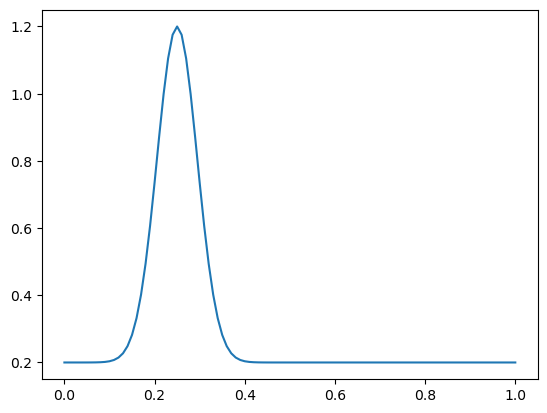

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13bb7fcf8>

In [6]:
a0_burgers = a0 .+ 0.2
plot(xs, a0_burgers)

In [7]:
a = copy(a0_burgers)
for i in 1:20000
    a = upwind_burgers_update(dx/10.0, dx, a)
end

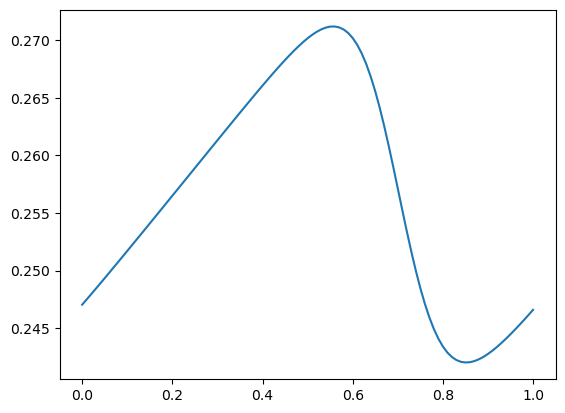

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13d909f60>

In [8]:
plot(xs, a)

In [2]:
function LW_update(dt, dx, a, u)
    C = u*dt/dx
    
    a_new = copy(a)
    for i in 2:size(a_new,1)-1
        a_new[i] = 0.5*((1+C)*a[i-1] + (1-C)*a[i+1])
    end
    a_new[1] = 0.5*((1+C)*a[end] + (1-C)*a[2])
    a_new[end] = 0.5*((1+C)*a[end-1] + (1-C)*a[1])
    
    a_new
end

LW_update (generic function with 1 method)

In [12]:
a = copy(a0)
for i in 1:200
    a = LW_update(0.05, 1.0, a, 1.0)
end

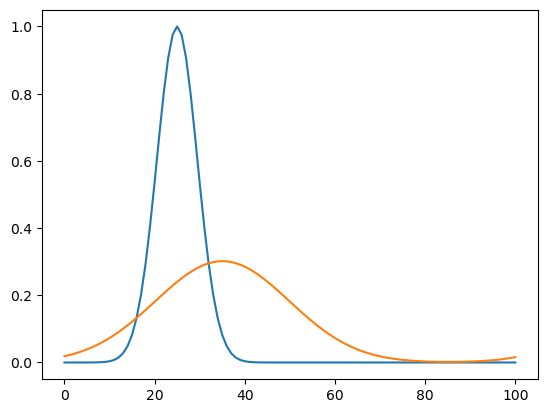

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x122956668>

In [13]:
plot(a0)
plot(a)

In [12]:
function FV_burger_update(dt, dx, u)
    u_new = copy(u)
    
    for i in 2:size(u,1)
        u_new[i] = u[i] - 0.5*dt/dx*(u[i]*u[i] - u[i-1]*u[i-1])
    end
    u_new[1] = u[1] - 0.5*dt/dx*(u[1]*u[1] - u[end]*u[end])
    
    u_new
end

FV_burger_update (generic function with 1 method)

In [13]:
a = copy(a0)
for i in 1:2000
    a = FV_burger_update(0.1, 1.0, a)
end

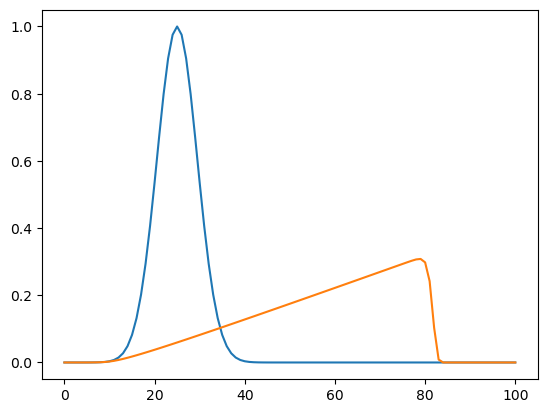

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13dbdaf98>

In [14]:
plot(a0)
plot(a)

In [15]:
sum(a), sum(a0)

(11.209982370851193, 11.209982370851195)